# Simple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

## Importing the dataset

In [2]:
dataset = pd.read_csv('stock_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## One hot encoding

In [3]:
dataset = pd.get_dummies(dataset, columns = ['Company'])
print(dataset)

            Date        Open        High         Low       Close   Adj Close  \
0     2018-11-20   44.592499   45.367500   43.877499   44.244999   42.466824   
1     2018-11-20   71.875000   76.737503   71.000000   74.773003   74.773003   
2     2018-11-20  127.029999  134.160004  126.849998  132.429993  132.429993   
3     2018-11-20   22.783333   23.320000   22.236668   23.166000   23.166000   
4     2018-11-21   44.932499   45.067501   44.137501   44.195000   42.418831   
...          ...         ...         ...         ...         ...         ...   
5023  2023-11-16  189.570007  190.960007  188.649994  189.710007  189.710007   
5024  2023-11-17  330.260010  335.500000  329.350006  335.040009  335.040009   
5025  2023-11-17  190.250000  190.380005  188.570007  189.690002  189.690002   
5026  2023-11-17  142.660004  145.229996  142.539993  145.179993  145.179993   
5027  2023-11-17  232.000000  237.389999  226.539993  234.300003  234.300003   

         Volume  Company_AAPL  Company_

In [4]:
print(X)

[['2018-11-20' 44.592499 45.3675 ... 44.244999 42.466824 271300800]
 ['2018-11-20' 71.875 76.737503 ... 74.773003 74.773003 217576000]
 ['2018-11-20' 127.029999 134.160004 ... 132.429993 132.429993 41939500]
 ...
 ['2023-11-17' 190.25 190.380005 ... 189.690002 189.690002 50922700]
 ['2023-11-17' 142.660004 145.229996 ... 145.179993 145.179993 49636700]
 ['2023-11-17' 232.0 237.389999 ... 234.300003 234.300003 142532800]]


In [5]:
print(y)

['AAPL' 'AMZN' 'META' ... 'AAPL' 'AMZN' 'TSLA']


## Data preprocessing

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5028 entries, 0 to 5027
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5028 non-null   object 
 1   Open          5028 non-null   float64
 2   High          5028 non-null   float64
 3   Low           5028 non-null   float64
 4   Close         5028 non-null   float64
 5   Adj Close     5028 non-null   float64
 6   Volume        5028 non-null   int64  
 7   Company_AAPL  5028 non-null   uint8  
 8   Company_AMZN  5028 non-null   uint8  
 9   Company_META  5028 non-null   uint8  
 10  Company_TSLA  5028 non-null   uint8  
dtypes: float64(5), int64(1), object(1), uint8(4)
memory usage: 294.7+ KB


In [7]:

dataset.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,Company_AAPL,Company_AMZN,Company_META,Company_TSLA
0,2018-11-20,44.592499,45.367500,43.877499,44.244999,42.466824,271300800,1,0,0,0
1,2018-11-20,71.875000,76.737503,71.000000,74.773003,74.773003,217576000,0,1,0,0
2,2018-11-20,127.029999,134.160004,126.849998,132.429993,132.429993,41939500,0,0,1,0
3,2018-11-20,22.783333,23.320000,22.236668,23.166000,23.166000,120070500,0,0,0,1
4,2018-11-21,44.932499,45.067501,44.137501,44.195000,42.418831,124496800,1,0,0,0
5,2018-11-21,77.149498,77.500000,75.750000,75.836502,75.836502,114336000,0,1,0,0
6,2018-11-21,23.466667,23.540001,22.493334,22.546000,22.546000,70302000,0,0,0,1
7,2018-11-21,134.399994,137.190002,134.130005,134.820007,134.820007,25469700,0,0,1,0
8,2018-11-23,43.735001,44.150002,43.025002,43.072498,41.341454,94496000,1,0,0,0
9,2018-11-23,133.649994,134.500000,131.259995,131.729996,131.729996,11886100,0,0,1,0


In [8]:
dataset.shape

(5028, 11)

In [9]:
dataset.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Company_AAPL    0
Company_AMZN    0
Company_META    0
Company_TSLA    0
dtype: int64

In [10]:
dataset['Log_Return'] = np.log(dataset['Close'] / dataset['Close'].shift(1))

In [11]:
dataset.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Company_AAPL,Company_AMZN,Company_META,Company_TSLA,Log_Return
0,2018-11-20,44.592499,45.367500,43.877499,44.244999,42.466824,271300800,1,0,0,0,NaN
1,2018-11-20,71.875000,76.737503,71.000000,74.773003,74.773003,217576000,0,1,0,0,0.524715
2,2018-11-20,127.029999,134.160004,126.849998,132.429993,132.429993,41939500,0,0,1,0,0.571597
3,2018-11-20,22.783333,23.320000,22.236668,23.166000,23.166000,120070500,0,0,0,1,-1.743368
4,2018-11-21,44.932499,45.067501,44.137501,44.195000,42.418831,124496800,1,0,0,0,0.645926
5,2018-11-21,77.149498,77.500000,75.750000,75.836502,75.836502,114336000,0,1,0,0,0.539968
6,2018-11-21,23.466667,23.540001,22.493334,22.546000,22.546000,70302000,0,0,0,1,-1.213022
7,2018-11-21,134.399994,137.190002,134.130005,134.820007,134.820007,25469700,0,0,1,0,1.788383
8,2018-11-23,43.735001,44.150002,43.025002,43.072498,41.341454,94496000,1,0,0,0,-1.141056
9,2018-11-23,133.649994,134.500000,131.259995,131.729996,131.729996,11886100,0,0,1,0,1.117870


In [12]:
dataset.dropna(inplace=True)

In [13]:
dataset.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Company_AAPL,Company_AMZN,Company_META,Company_TSLA,Log_Return
1,2018-11-20,71.875000,76.737503,71.000000,74.773003,74.773003,217576000,0,1,0,0,0.524715
2,2018-11-20,127.029999,134.160004,126.849998,132.429993,132.429993,41939500,0,0,1,0,0.571597
3,2018-11-20,22.783333,23.320000,22.236668,23.166000,23.166000,120070500,0,0,0,1,-1.743368
4,2018-11-21,44.932499,45.067501,44.137501,44.195000,42.418831,124496800,1,0,0,0,0.645926
5,2018-11-21,77.149498,77.500000,75.750000,75.836502,75.836502,114336000,0,1,0,0,0.539968
6,2018-11-21,23.466667,23.540001,22.493334,22.546000,22.546000,70302000,0,0,0,1,-1.213022
7,2018-11-21,134.399994,137.190002,134.130005,134.820007,134.820007,25469700,0,0,1,0,1.788383
8,2018-11-23,43.735001,44.150002,43.025002,43.072498,41.341454,94496000,1,0,0,0,-1.141056
9,2018-11-23,133.649994,134.500000,131.259995,131.729996,131.729996,11886100,0,0,1,0,1.117870
10,2018-11-23,75.849998,76.809998,75.090500,75.102997,75.102997,54152000,0,1,0,0,-0.561894


In [14]:
X = dataset[['Open', 'High', 'Low', 'Adj Close', 'Volume','Company_AAPL', 'Company_AMZN', 'Company_META' ,'Company_TSLA']]
y = dataset['Log_Return']

## Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [16]:
print(X_train)
print(y_train)

            Open        High         Low   Adj Close     Volume  Company_AAPL  \
701    88.511002   89.433502   87.439003   88.256500  121164000             0   
3478  313.006653  315.200012  285.899994  291.093323   92519100             0   
3645  143.289993  146.550003  143.279999  145.093964   66253700             1   
2210  264.000000  268.850006  263.269989  267.079987   17320800             0   
4610  183.740005  187.050003  183.669998  186.502106   51245300             1   
...          ...         ...         ...         ...        ...           ...   
2896  337.000000  338.839996  328.980011  329.220001   28307500             0   
2764  147.440002  148.500000  146.779999  146.302414   60549600             1   
906   188.320007  189.699997  186.899994  189.550003   10516900             0   
3981  142.059998  142.800003  138.750000  137.879318   97918500             1   
236    80.050003   81.699997   80.028000   81.378998   73634000             0   

      Company_AMZN  Company

## Training the Simple Linear Regression model on the Training set

In [17]:
print(len(X_test), len(y_test))

1006 1006


In [18]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

## Predicting the Test set results

In [19]:
y_pred = regressor.predict(X_test)

## Calculating Accuracy Score

---



In [20]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.35897343010194194


## Visualising the Training set results

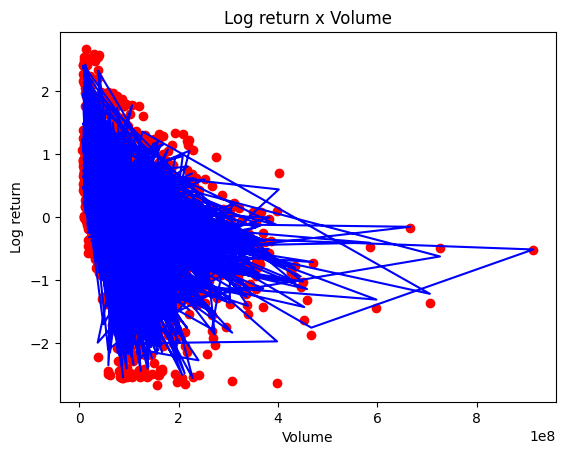

In [21]:
plt.scatter(X_train["Volume"], y_train, color = 'red')
plt.plot(X_train["Volume"], regressor.predict(X_train), color = 'blue')
plt.title('Log return x Volume')
plt.xlabel('Volume')
plt.ylabel('Log return')
plt.show()

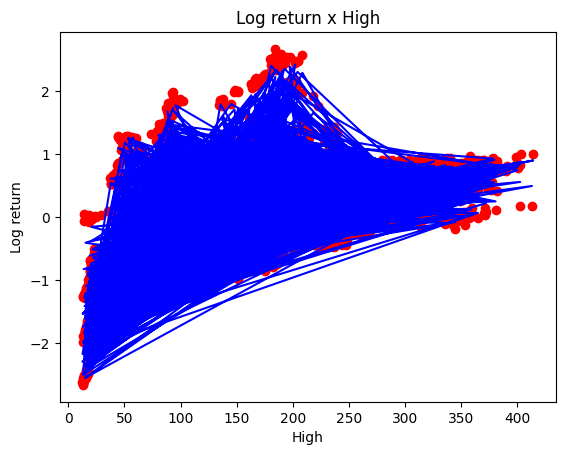

In [22]:
plt.scatter(X_train["High"], y_train, color = 'red')
plt.plot(X_train["High"], regressor.predict(X_train), color = 'blue')
plt.title('Log return x High')
plt.xlabel('High')
plt.ylabel('Log return')
plt.show()

## Visualising the Test set results

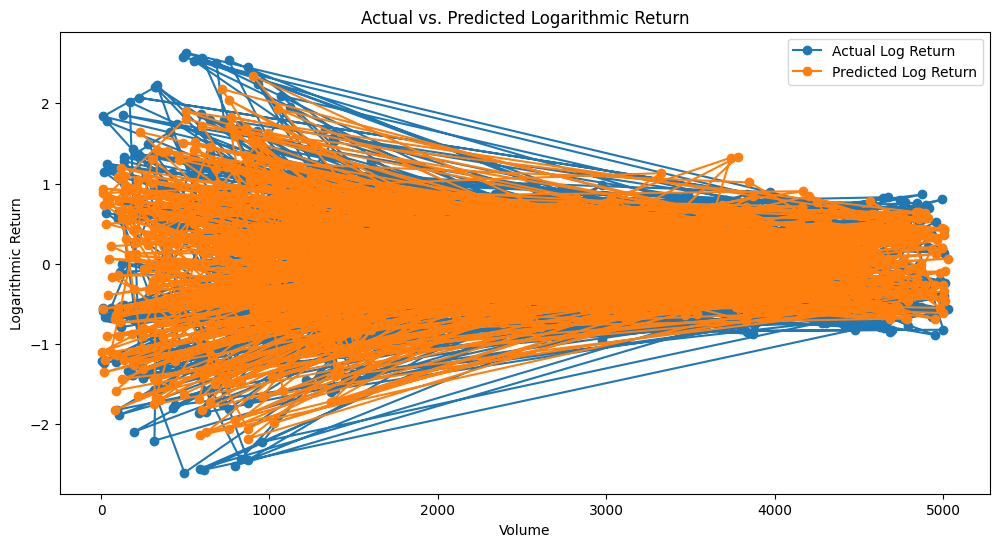

In [23]:
results = pd.DataFrame({'Volume': X_test.index, 'Actual_Log_Return': y_test, 'Predicted_Log_Return': y_pred})
results = results.set_index('Volume')

plt.figure(figsize=(12, 6))
plt.plot(results.index, results['Actual_Log_Return'], label='Actual Log Return', marker='o')
plt.plot(results.index, results['Predicted_Log_Return'], label='Predicted Log Return', marker='o')
plt.title('Actual vs. Predicted Logarithmic Return')
plt.xlabel('Volume')
plt.ylabel('Logarithmic Return')
plt.legend()
plt.show()

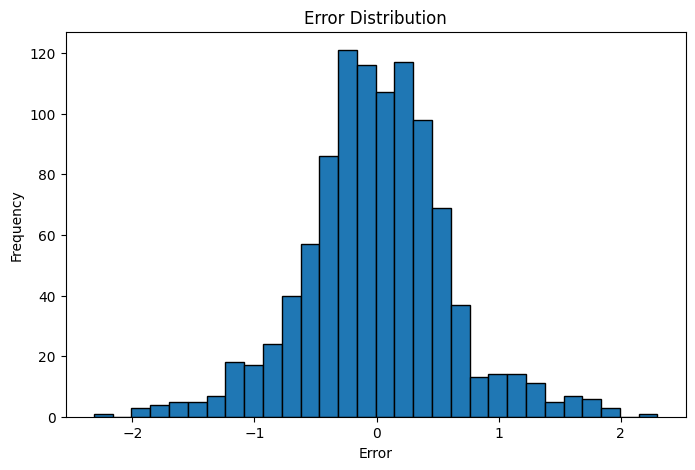

In [24]:
plt.figure(figsize=(8, 5))
errors = results['Actual_Log_Return'] - results['Predicted_Log_Return']
plt.hist(errors, bins=30, edgecolor='black')
plt.title('Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

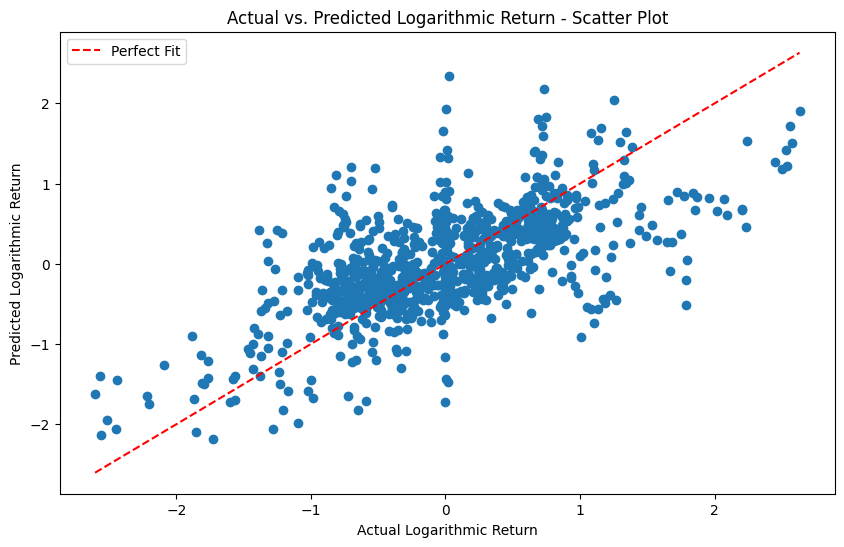

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(results['Actual_Log_Return'], results['Predicted_Log_Return'])
plt.plot([results['Actual_Log_Return'].min(), results['Actual_Log_Return'].max()],
         [results['Actual_Log_Return'].min(), results['Actual_Log_Return'].max()],
         linestyle='--', color='red', label='Perfect Fit')
plt.title('Actual vs. Predicted Logarithmic Return - Scatter Plot')
plt.xlabel('Actual Logarithmic Return')
plt.ylabel('Predicted Logarithmic Return')
plt.legend()
plt.show()

<ipython-input-28-130178868c39>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


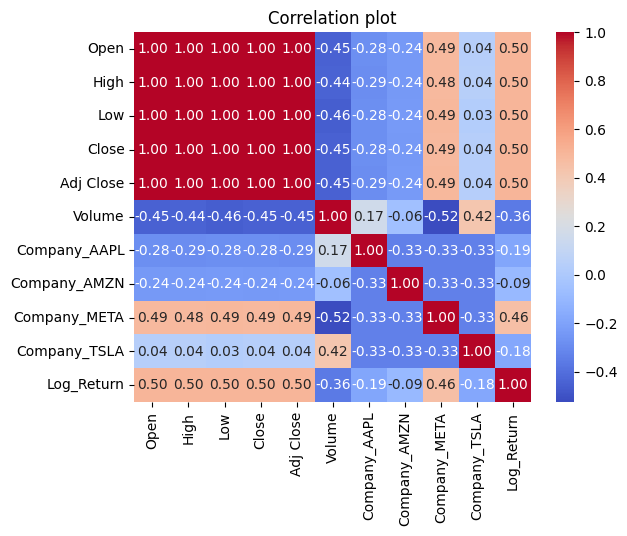

In [28]:
import seaborn as sns
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation plot")
plt.show()